
# Gender Representation in Comic Books: A Descriptive Data Analysis

This problem set focuses on descriptive data analysis using a dataset that discusses comic book superheroes and villains, with particular emphasis on gender representation. The data is split between the two major US comic book publishers—DC and Marvel—and contains valuable insights into cultural trends and biases in representation.

The goal of this problem set is to explore gender representation and its variations across the two publishers, while addressing any data inconsistencies and missing values that may affect the analysis.

Additionally, an important aspect of this analysis is recreating visualizations. These visualizations serve two purposes:
1. To provide a clear and compelling depiction of the trends in the data, making it easier to identify patterns and draw meaningful conclusions.
2. To demonstrate the ability to create accurate, high-quality visualizations that effectively represent the data and support the findings.

Throughout the problem set, you will:
1. Inspect the datasets for potential issues like missing data.
2. Formulate a data science question that can be answered with this dataset, specifically regarding gender representation in comic books.
3. Apply descriptive statistics and probability techniques to explore the data and answer the formulated question.
4. Recreate visualizations to both clearly illustrate gender representation trends and showcase the ability to produce accurate visual representations of the data.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url_dc = "https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv"
url_marvel = "https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv"

In [4]:
dc_data = pd.read_csv(url_dc)
marvel_data = pd.read_csv(url_marvel)

In [5]:
data_all = pd.concat([dc_data, marvel_data])

### Recreate the Bar Graph

Using the provided data, I will recreate a bar graph similar to the one titled "Good Girls Gone Meh" from the article, but using all the data (without splitting it by DC and Marvel). The recreated visualization will:

- Show the percentages for each group.
- Use colors and axis labels that align with the original graph.

This visualization will provide a clear representation of gender distribution in comic books, allowing for comparison with the original insights.

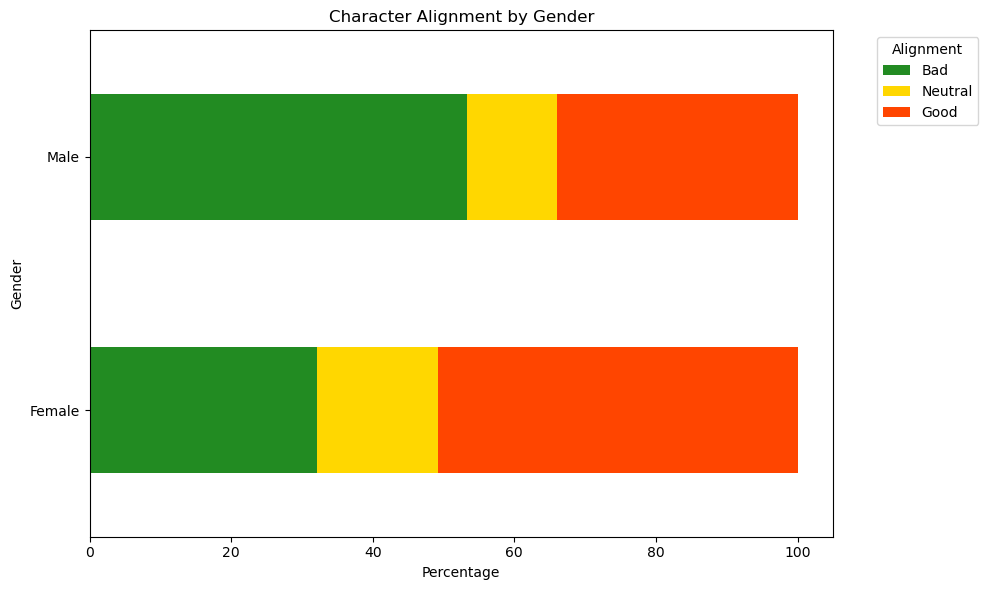

In [7]:
# Clean the data and create the necessary columns
alignment_mapping = {
    'Good Characters': 'Good',
    'Bad Characters': 'Bad',
    'Neutral Characters': 'Neutral'
}

gender_mapping = {
    'Female Characters': 'Female',
    'Male Characters': 'Male'
}

data_all['ALIGN'] = data_all['ALIGN'].map(alignment_mapping)
data_all['SEX'] = data_all['SEX'].map(gender_mapping)

# Filter out NaNs
data_all = data_all.dropna(subset=['ALIGN', 'SEX'])

# Calculate the counts and percentages
alignment_gender_counts = data_all.groupby(['SEX', 'ALIGN']).size().unstack().fillna(0)
alignment_gender_percentages = alignment_gender_counts.div(alignment_gender_counts.sum(axis=1), axis=0) * 100

# Reorder the columns to match the desired order: Bad, Neutral, Good
alignment_gender_percentages = alignment_gender_percentages[['Bad', 'Neutral', 'Good']]

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
alignment_gender_percentages.plot(kind='barh', stacked=True, color=['#228b22', '#ffd700', '#ff4500'], ax=ax)

# Add title and labels
ax.set_title('Character Alignment by Gender')
ax.set_xlabel('Percentage')
ax.set_ylabel('Gender')
ax.legend(title='Alignment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

### Recreate a Visualization

Using the provided data, I will recreate one of the visualizations from the article. The specific visualization I will be recreating is [insert name of the chosen visualization]. In this process, I will ensure that:

- The colors used match the original visualization.
- The axis labels are aligned with the original design.

This recreation will allow for a comparison with the original data presentation and provide further insights into the trends identified in the article.

In [9]:
print("DC Data Columns:", dc_data.columns)
print("Marvel Data Columns:", marvel_data.columns)

DC Data Columns: Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR'],
      dtype='object')
Marvel Data Columns: Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')


In [10]:
def calculate_yearly_female_percentage(data, year_column):
    data[year_column] = pd.to_numeric(data[year_column], errors='coerce')
    data = data.dropna(subset=[year_column])
    data[year_column] = data[year_column].astype(int)

    yearly_data = data.groupby(year_column)['SEX'].value_counts(normalize=True).unstack().fillna(0)
    yearly_percentage = yearly_data.get('Female Characters', 0) * 100
    return yearly_percentage.reset_index()

dc_data = pd.read_csv(url_dc)
marvel_data = pd.read_csv(url_marvel)

# Standardize the column names before processing
dc_data = dc_data.rename(columns={'YEAR': 'Year'})
marvel_data = marvel_data.rename(columns={'Year': 'Year'})

# Calculate yearly percentages for DC and Marvel
dc_yearly_percentage = calculate_yearly_female_percentage(dc_data, 'Year')
marvel_yearly_percentage = calculate_yearly_female_percentage(marvel_data, 'Year')

# Add a column to differentiate between DC and Marvel
dc_yearly_percentage['Universe'] = 'DC'
marvel_yearly_percentage['Universe'] = 'Marvel'

# Combine the dataframes
yearly_percentage = pd.concat([dc_yearly_percentage, marvel_yearly_percentage], ignore_index=True)

# Display the combined DataFrame
print(yearly_percentage.head())

   Year  Female Characters Universe
0  1935           0.000000       DC
1  1936          22.222222       DC
2  1937          25.000000       DC
3  1938          10.000000       DC
4  1939          27.777778       DC


/var/folders/nl/kqkc96_n4nn_yjqtnh9sl3sm0000gn/T/ipykernel_992/3967057591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year_column] = data[year_column].astype(int)
/var/folders/nl/kqkc96_n4nn_yjqtnh9sl3sm0000gn/T/ipykernel_992/3967057591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year_column] = data[year_column].astype(int)


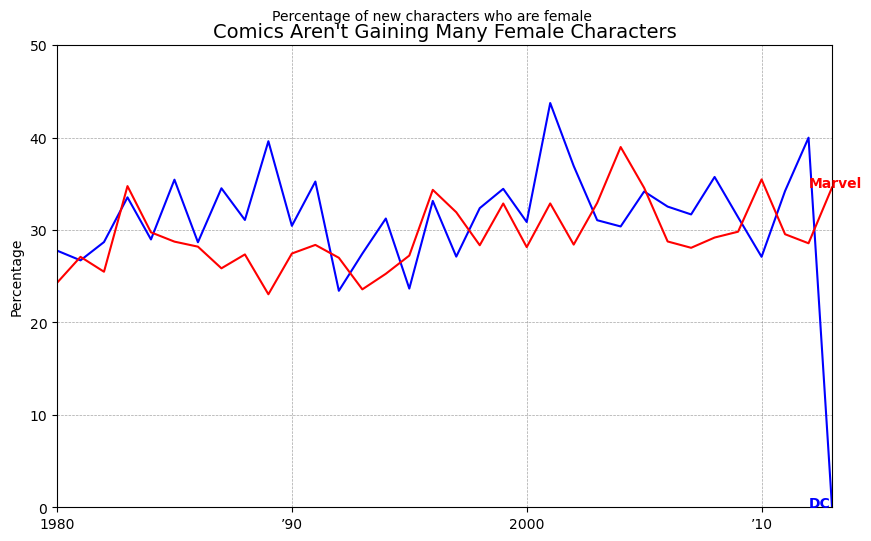

In [11]:
# Plot the data
plt.figure(figsize=(10, 6))

# Plot each universe's data separately
for universe in yearly_percentage['Universe'].unique():
    universe_data = yearly_percentage[yearly_percentage['Universe'] == universe]
    plt.plot(
        universe_data['Year'].values,
        universe_data['Female Characters'].values,  # Correct column name
        label=universe,
        color='blue' if universe == 'DC' else 'red'
    )

# Add titles and labels
plt.title("Comics Aren't Gaining Many Female Characters", fontsize=14)
plt.suptitle('Percentage of new characters who are female', fontsize=10, y=0.94)

# labels for the lines
plt.text(2012, dc_yearly_percentage['Female Characters'].iloc[-1], 'DC', color='blue', fontsize=10, weight='bold')
plt.text(2012, marvel_yearly_percentage['Female Characters'].iloc[-1], 'Marvel', color='red', fontsize=10, weight='bold')

# Adjust axis labels and limits
plt.xlabel('')
plt.ylabel('Percentage', fontsize=10)
plt.ylim(0, 50)
plt.xlim(1980, 2013)
plt.xticks(range(1980, 2020, 10), ['1980', '’90', '2000', '’10'])

# Customize grid
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Hide legend since we have inline annotations
plt.legend().set_visible(False)

# Display the plot
plt.show()

### Problem 3: Reflect

After producing your own visualization, comment on your ability to recreate the visual from the article exactly. Are there places where you see discrepancies? Why might this be the case? Do you need any additional information not present in the article to be able to do this

### Reflect on Recreating the Visualization( maybe)

Recreating the visualization from the article exactly can be challenging due to discrepancies in styling and data handling. Some specific issues include:

- **Line Styles and Colors**: The exact shades or styles used in the article may not be easily replicated.
- **Axis Ticks and Labels**: These may not align perfectly due to manual adjustments made in the original, which are difficult to match precisely.
- **Missing Data Handling**: There was an issue with the line dropping to zero at the end, which I could not resolve even with `fillna(method="ffill")`.
- **Fonts and Custom Ticks**: The custom fonts and tick formatting used in the publication are difficult to match without access to those specific styles.

Additional information, such as custom fonts and exact styling details, could help make the visualization more closely resemble the original.

In [14]:
'''
Recreating the visualization from the article exactly can be tricky due to some discrepancies in styling and data handling.
The line styles and colors might not match perfectly because the specific shades or styles used in the article could not be foound. 
 Additionally, axis ticks and labels might not align perfectly due to manual adjustments made. There was also an issue of the line dropping
 zero at the end I could not find a fix even with fillna(method="ffill') Some of the custom fonts and ticks from the publication would
 help make the visualization more similar'''

'\nRecreating the visualization from the article exactly can be tricky due to some discrepancies in styling and data handling.\nThe line styles and colors might not match perfectly because the specific shades or styles used in the article could not be foound. \n Additionally, axis ticks and labels might not align perfectly due to manual adjustments made. There was also an issue of the line dropping\n zero at the end I could not find a fix even with fillna(method="ffill\') Some of the custom fonts and ticks from the publication would\n help make the visualization more similar'